### Associations, Interventions, Regressions

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# set random seeds
np.random.seed(42)
N_SAMPLES = 5000

In [3]:
alpha = 1.12
beta = 0.93
epsilon = np.random.randn(N_SAMPLES)

In [4]:
# Data Generating Process
X = np.random.randn(N_SAMPLES)
y = alpha + beta * X + 0.5 * epsilon

In [5]:
X = sm.add_constant(X)

In [7]:
X[:5]

array([[ 1.        , -0.42375968],
       [ 1.        , -0.45341411],
       [ 1.        , -1.79564317],
       [ 1.        , -0.33009019],
       [ 1.        ,  0.73282908]])

In [9]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 1.774e+04
Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:57:19   Log-Likelihood:                -3610.8
No. Observations:                5000   AIC:                             7226.
Df Residuals:                    4998   BIC:                             7239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1228      0.007    159.324      0.000       1.109       1.137
x1             0.9291      0.007    133.210      0.000       0.915       0.943
==============================================================================
Omnibus:                        0.512   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.461
Skew:                          -0.012   Prob(JB):                        0.794
Kurtosis:                       3.040   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 변수에 대해 확실하지 않다면, 변수를 대조군으로 사용하지 말라
- 개념적으로 의미 있는 제어 변수를 사용하라
- 독립 변수와 제어 변수 간의 관계에 대해서 비교 테스트를 수행하라
- 제어 변수가 있는 경우와 없는 경우의 결과를 대조하라

### Spuriousness

In [10]:
a = np.random.randn(N_SAMPLES)
x = 2 * a + 0.5 * np.random.randn(N_SAMPLES)
y = 2 * a + 0.5 * np.random.randn(N_SAMPLES)
b = 1.5 * x + 0.75 * y

In [11]:
# define four model variants
variants = [
    [x],
    [x, a],
    [x, b],
    [x, a, b]
]

In [12]:
# fit models iteratively and store the results
for variant in variants :
    X = sm.add_constant(np.stack(variant).T)
    model = sm.OLS(y, X)
    fitted_model = model.fit()

### Structural Causal Model

In [13]:
a = np.random.randn(N_SAMPLES)
x = 2 * a + 0.7 * np.random.randn(N_SAMPLES)
y = 2 * a + 3 * x + 0.75 * x**2

In [15]:
X = sm.add_constant(
    np.stack([x, x**2, a]).T
)
model = sm.OLS(y, X).fit()

In [16]:
print(model.summary(xname = ['const','x','x^2','a']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.028e+34
Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:38:46   Log-Likelihood:             1.5891e+05
No. Observations:                5000   AIC:                        -3.178e+05
Df Residuals:                    4996   BIC:                        -3.178e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.048e-15   6.65e-17     15.758      0.0

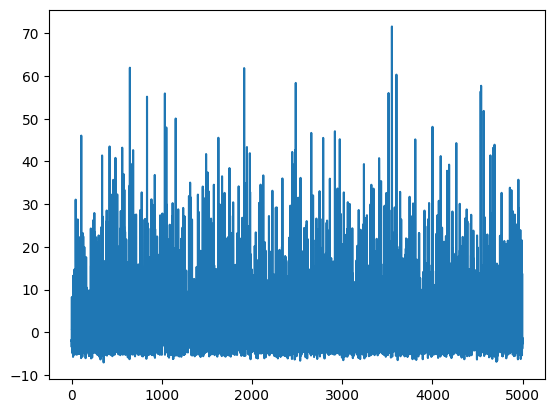

In [18]:
plt.plot(model.fittedvalues)